In [3]:
import igraph as ig
import matplotlib.pyplot as plt
import random
import math

# Erdős–Rényi random graph model and its applications in technology

I’m going to speak about a theory of random graphs and its practical applications. The information for this report was taken from wikipedia.

## Content
- What is the theory of random graphs?
- Areas for practical application
- How random graphs can be generated?
- A lot of examples

## What is the theory of random graphs?

The random graph theory are part of discrete mathematics/ It it created with joining the graph theory and theory of probability. The field of research is
- What are the properties of graphs with a large number of vertices and with a random distribution of edges?
- How to approximate their properties when the number ot vertices increases to infinity?
- What is a probability for a property of graph?

## Areas for application
Practical applications for the random theory can be found when we analyze complex networks. For example:
- computer communications in large networks including internet;
- people interactions in giant social networks;
- transport networks;
- physical and chemical processes when liquid flows through a porous materials. Percolation is a term for this process

![](./intro.png)

In [4]:
def plot_graphs(ncols, nrows, size_probs):
    random.seed(0)
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 4), layout='constrained')
    i = 0
    palette = ig.RainbowPalette(ncols * nrows)
    for vertex_count, p in size_probs:
        g = ig.Graph.Erdos_Renyi(n=vertex_count, p=p, directed=False, loops=False)
        ig.summary(g)

        row = i // ncols
        col = i % ncols
        ig.plot(
            g,
            target=ax[row, col],
            palette=palette,
            vertex_size=5,
            vertex_color=palette.get(i),
            edge_width=0.7,
        )
        title = "Vertices={} Edges={} p={:.2} np={:0.1f}".format(len(g.vs), len(g.es), p, vertex_count * p)
        ax[row, col].set_title(title)
        i += 1

    plt.show()

def log_on_n(c, n):
    return c * math.log(n) / n


## How random graphs can be generated?

Наиболее часто для описания модели случайных графов используется. The Erdős–Rényi model refers to the model for generating random graphs or the evolution of a random network. These models are named after Hungarian mathematicians Paul Erdős and Alfréd Rényi, who introduced one of the models in 1959.

In the $G(n, p)$ model, a graph is constructed by connecting labeled nodes randomly. Each edge is included in the graph with probability $p$, independently from every other edge.

How random graph properties are changing propert
- network evolution whe the number при увеличении количества узлов, составляющих эти сети

Equivalently, the probability for generating each graph that has $n$ nodes and $M$ edges is $p^M(1 − p )^{\binom{n}{2} − M}$. The parameter $p$ in this model can be thought of as a weighting function; as $p$ increases from 0 to 1 , the model becomes more and more likely to include graphs with more edges and less and less likely to include graphs with fewer edges. In particular, the case $p=\frac{1}{2}$ corresponds to the case where all $2^\binom{n}{2}$ graphs on $n$ vertices are chosen with equal probability.

The behavior of random graphs are often studied in the case where $n$, the number of vertices, tends to infinity. In this case $p$ can be a function depending on n. For example, the statement that almost every graph in $G(n, \frac{2ln(n)}{n})$ is connected means that, as $n$ tends to infinity, the probability that a graph on $n$ vertices with edge probability $\frac{2ln(n)}{n}$ is connected tends to $1$.

## Example 1. Graph evolution when probability increase

IGRAPH U--- 100 6 -- 
IGRAPH U--- 100 24 -- 
IGRAPH U--- 100 46 -- 
IGRAPH U--- 100 112 -- 
IGRAPH U--- 100 188 -- 
IGRAPH U--- 100 388 -- 


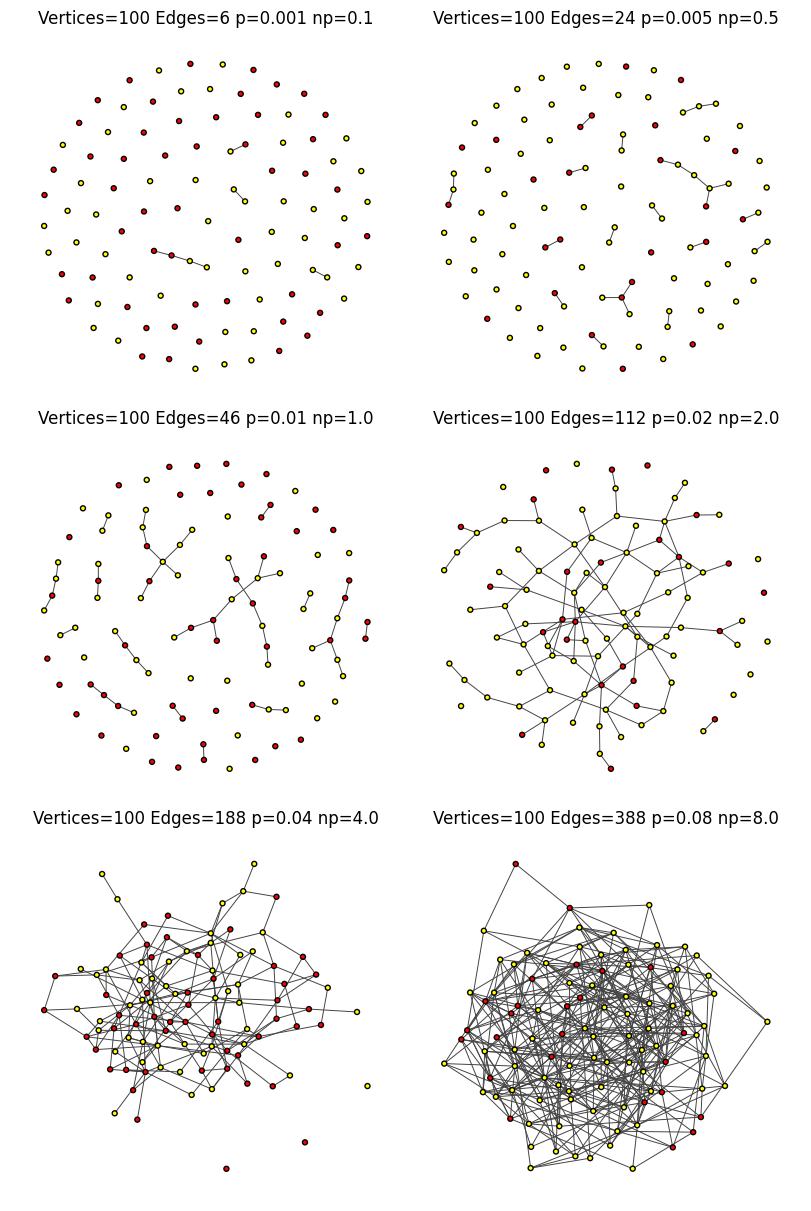

In [5]:
graph_size_prob_01 = [(100, p/100) for p in [0.1, 0.5, 1.0, 2.0, 4.0, 8.0]]
plot_graphs(2, 3, graph_size_prob_01)

## Example 2. Forest: a lot of small independent trees

$p(n)=\frac{0.5}{n}$

IGRAPH U--- 25 11 -- 
IGRAPH U--- 50 10 -- 
IGRAPH U--- 100 31 -- 
IGRAPH U--- 225 51 -- 
IGRAPH U--- 500 105 -- 
IGRAPH U--- 1000 270 -- 


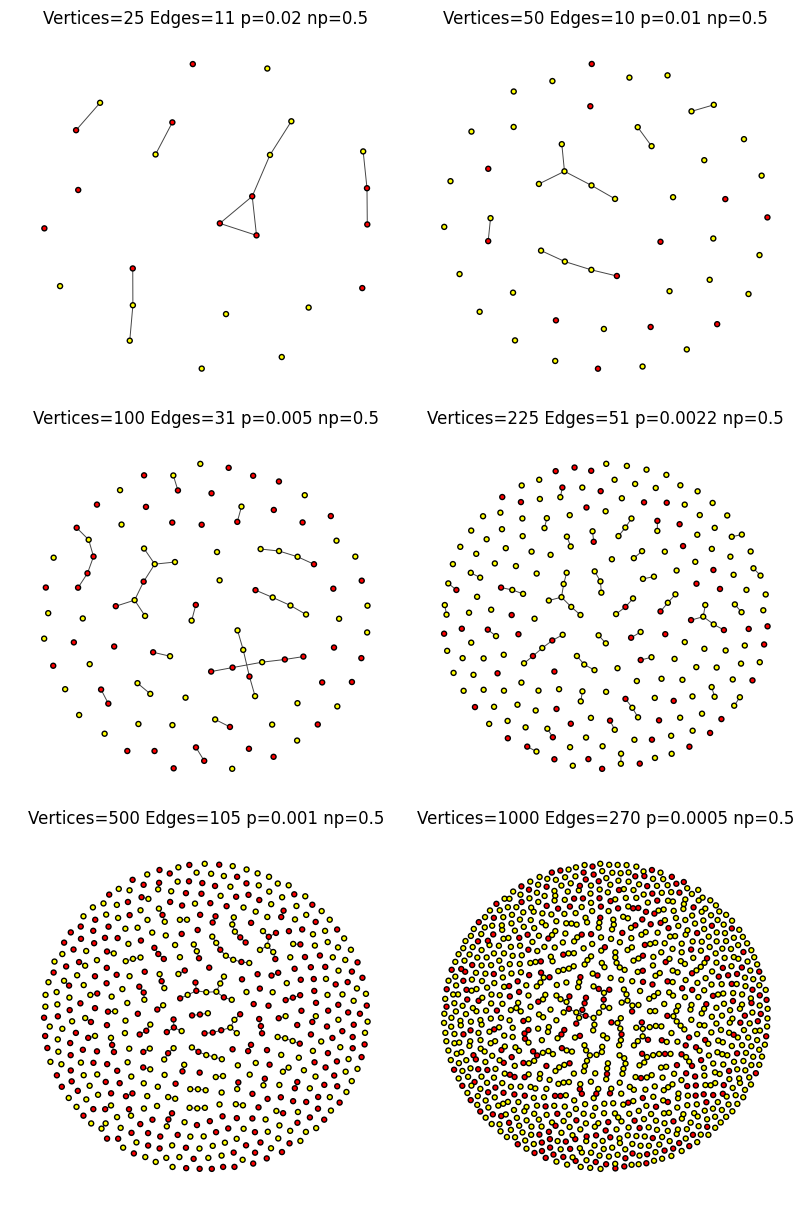

In [6]:
graph_size_prob_02 = [(n, 0.5 / n) for n in [25, 50, 100, 225, 500, 1000]]
plot_graphs(2, 3, graph_size_prob_02)

## Example 3. A giant component

$p(n)=\frac{0.5 \cdot ln(n)}{n}$

IGRAPH U--- 25 22 -- 
IGRAPH U--- 50 39 -- 
IGRAPH U--- 100 114 -- 
IGRAPH U--- 225 288 -- 
IGRAPH U--- 500 761 -- 
IGRAPH U--- 1000 1700 -- 


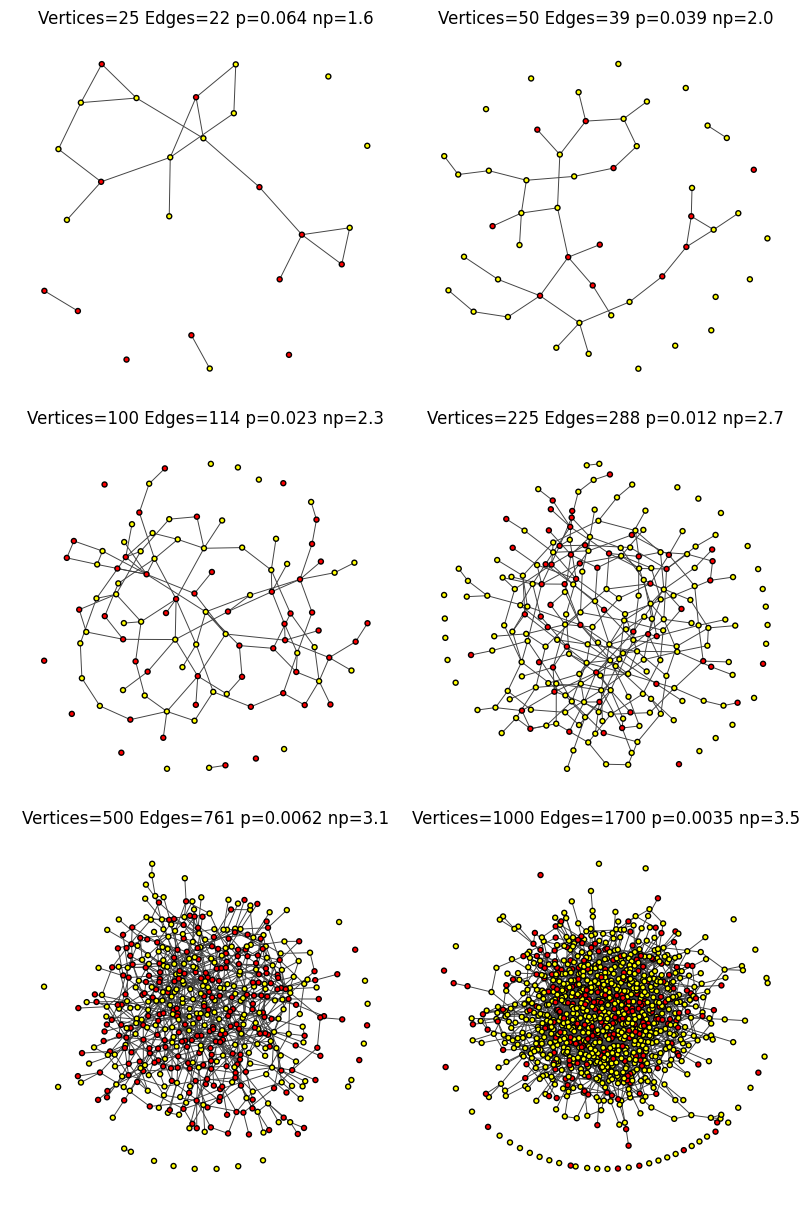

In [7]:
graph_size_prob_03 = [(n, log_on_n(0.5, n)) for n in [25, 50, 100, 225, 500, 1000]]
plot_graphs(2, 3, graph_size_prob_03)

## Example 4. Fully connected graph

$p(n)=\frac{1.5 \cdot ln(n)}{n}$

IGRAPH U--- 25 67 -- 
IGRAPH U--- 50 139 -- 
IGRAPH U--- 100 326 -- 
IGRAPH U--- 225 931 -- 
IGRAPH U--- 500 2284 -- 
IGRAPH U--- 1000 5257 -- 


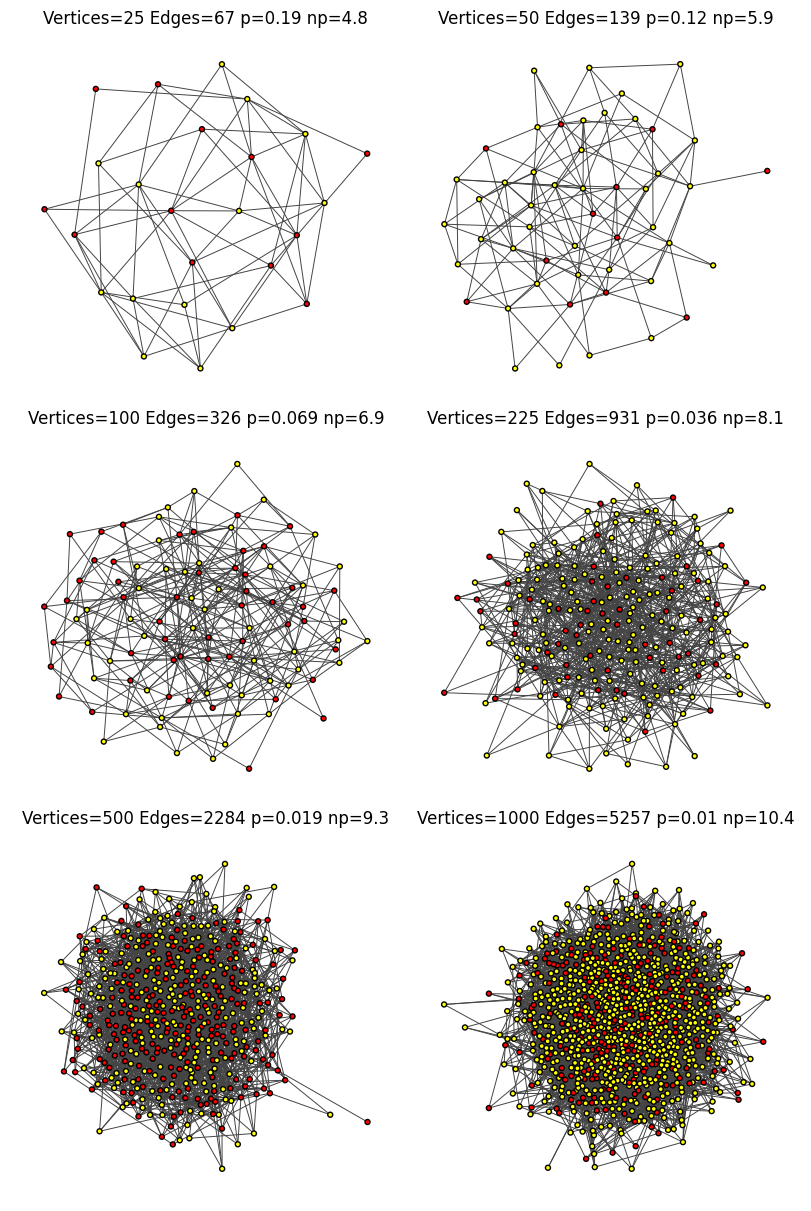

In [8]:
graph_size_prob_04 = [(n, log_on_n(1.501, n)) for n in [25, 50, 100, 225, 500, 1000]]
plot_graphs(2, 3, graph_size_prob_04)

## Conclusions

- In the beginning we introduced a random graph model Erdős–Rényi
- Talked about its practical applications
- At the end of presentation we have looked at examples of random graphs for various probabilities
- We have looked at evolution of random graphs when the number of vertices increases

## Question

### What a random graph from presented here is the best model for a situation when you are matching socks without pair?

![](socks-without-partners.png)